# Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

# Read the CSV files


In [2]:
historical_transaction_df = pd.read_csv(
    "../Datasets/Historical-transaction-data.csv"
)
store_info_df = pd.read_csv("../Datasets/Store-info.csv")
test_df = pd.read_csv("../Datasets/Testing-data.csv")

In [3]:
store_info_df.shape

(124, 3)

# Check the dataframes


## Historical Transaction Data


In [4]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


In [5]:
historical_transaction_df.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

In [6]:
historical_transaction_df.describe()

,invoice_id,item_price,quantity_sold
count,4.676540e+05,473974.000000,473974.000000
mean,1.996684e+06,206.689734,1.925506
std,1.344594e+06,166.764732,1.634535
min,1.700000e+01,35.000000,-1.000000
25%,1.032114e+06,100.000000,1.000000
50%,2.032996e+06,200.000000,2.000000
75%,3.032568e+06,220.000000,2.000000
max,8.331754e+06,17400.000000,101.000000


In [7]:
historical_transaction_df.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Store Info data


In [8]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [9]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [10]:
store_info_df.dtypes

shop_id            object
shop_area_sq_ft     int64
shop_profile       object
dtype: object

Contains the null values for the test data


In [11]:
store_info_df.isnull().sum()

shop_id             0
shop_area_sq_ft     0
shop_profile       24
dtype: int64

### Test data


In [12]:
test_df.head()

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Low


In [13]:
test_df.drop(columns=["shop_profile"], inplace=True)

In [14]:
test_df.head()

,shop_id
0,SHOP046
1,SHOP024
2,SHOP023
3,SHOP097
4,SHOP044


In [15]:
test_df.shape

(24, 1)

# Extracting information from the historical transaction data


In [16]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


## 1. Fixing the Quantity column


Get the minimum value for the each beverage and fix the quantity column


In [17]:
min_prices = (
    historical_transaction_df[["item_description", "item_price"]]
    .groupby("item_description")["item_price"]
    .min()
    .to_dict()
)

# if item_name is in min_prices, then use min_prices[item_name] to calculate the quantity sold or use the existing quantity sold


def calculate_quantity_sold(row):
    if row["item_description"] in min_prices:
        return row["item_price"] // min_prices[row["item_description"]]
    elif row["quantity_sold"] == 0:
        return 1
    else:
        return row["quantity_sold"]


historical_transaction_df["quantity_sold"] = historical_transaction_df.apply(
    lambda row: calculate_quantity_sold(row), axis=1
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3


In [18]:
historical_transaction_df["quantity_sold"].describe()

count    473974.000000
mean          1.464416
std           1.570627
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         100.000000
Name: quantity_sold, dtype: float64

## 2. Add Unit Price feature


In [19]:
historical_transaction_df["unit_price"] = (
    historical_transaction_df["item_price"]
    // historical_transaction_df["quantity_sold"]
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


## 3. Item description feature


#### Fixing the missing values


In [20]:
historical_transaction_df.isna().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
unit_price              0
dtype: int64

There are missing values in Item description feature


In [21]:
# group by item_description and find the all the unique values of item_price
beverage_price_df = historical_transaction_df.groupby("item_description")[
    "item_price"
].unique()
beverage_price_df = pd.DataFrame(beverage_price_df)

In [22]:
beverage_price_df.head()

,item_price
item_description,
BOTTLED DRINKING WATER 1.5L,"[140, 70, 280, 420, 210, 560, 350, 490, 700, 6..."
BOTTLED DRINKING WATER 500ML,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14..."
CHOCOLATE MILK 180ML,"[350, 140, 70, 210, 280, 700, 1050, 490, 840, ..."
CREAM SODA 1.5L,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2..."
CREAM SODA 1L,"[150, 300, 450, 600, 750, 1050, 900, 1200, 1500]"


In [23]:
# get the minimum price of each item
beverage_price_df["min_price"] = beverage_price_df["item_price"].apply(lambda x: min(x))

In [24]:
beverage_price_df.reset_index(inplace=True)

In [25]:
beverage_price_df.head(37)

,item_description,item_price,min_price
0,BOTTLED DRINKING WATER 1.5L,"[140, 70, 280, 420, 210, 560, 350, 490, 700, 6...",70
1,BOTTLED DRINKING WATER 500ML,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14...",35
2,CHOCOLATE MILK 180ML,"[350, 140, 70, 210, 280, 700, 1050, 490, 840, ...",65
3,CREAM SODA 1.5L,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2...",220
4,CREAM SODA 1L,"[150, 300, 450, 600, 750, 1050, 900, 1200, 1500]",150
5,CREAM SODA 500ML,"[100, 200, 300, 600, 400, 1000, 500, 1100, 700...",100
6,CREAM SODA APPLE POP 1L,"[150, 750, 450, 300, 600, 900, 1950]",150
7,DRY GINGER ALE PET 500ML,"[320, 480, 300, 160, 150, 640, 1280, 450, 2400...",150
8,FIT O MANGO 1L,"[290, 270, 580, 810, 540, 870, 1080, 1450, 232...",270
9,FIT O MANGO 200ML,"[60, 120, 360, 70, 180, 240, 480, 140, 490, 72...",60


Get the beverages with their frequencies


In [26]:
# get the beverages with frequencies from historical_transaction_df
beverage_freq_df = (
    historical_transaction_df.groupby("item_description")["item_description"]
    .count()
    .reset_index(name="frequency")
)
beverage_freq_df = pd.DataFrame(beverage_freq_df)
beverage_freq_df.head()

,item_description,frequency
0,BOTTLED DRINKING WATER 1.5L,9194
1,BOTTLED DRINKING WATER 500ML,15786
2,CHOCOLATE MILK 180ML,40
3,CREAM SODA 1.5L,39608
4,CREAM SODA 1L,3668


In [27]:
# sort the dataframe by frequency
beverage_freq_df.sort_values(by="frequency", ascending=False, inplace=True)
beverage_freq_df.head()

,item_description,frequency
14,GINGER BEER 1.5L,59864
3,CREAM SODA 1.5L,39608
5,CREAM SODA 500ML,34320
15,GINGER BEER 1L,26808
27,ORANGE BARLEY 1.5L,23180


In [28]:
beverage_freq_df = pd.merge(beverage_freq_df, beverage_price_df, on="item_description")

In [29]:
beverage_freq_df.head(37)

,item_description,frequency,item_price,min_price
0,GINGER BEER 1.5L,59864,"[220, 660, 440, 880, 1100, 1320, 1540, 1980, 1...",220
1,CREAM SODA 1.5L,39608,"[220, 660, 440, 880, 1100, 1320, 1540, 2200, 2...",220
2,CREAM SODA 500ML,34320,"[100, 200, 300, 600, 400, 1000, 500, 1100, 700...",100
3,GINGER BEER 1L,26808,"[150, 300, 450, 750, 600, 1050, 900, 1650, 195...",150
4,ORANGE BARLEY 1.5L,23180,"[220, 660, 440, 880, 1100, 1760, 1320, 3960, 2...",220
5,NECTO 1.5L,21746,"[220, 440, 660, 1320, 880, 1100, 1540, 2200, 2...",220
6,SODA 500ML,16802,"[70, 140, 210, 420, 280, 700, 350, 910, 770, 5...",70
7,BOTTLED DRINKING WATER 500ML,15786,"[70, 35, 210, 245, 175, 105, 280, 805, 840, 14...",35
8,SODA PET 1.5L,15652,"[160, 150, 320, 450, 640, 960, 480, 300, 1600,...",150
9,FIT O ORANGE 1L,15392,"[290, 270, 580, 870, 540, 1160, 1450, 2610, 20...",270


In [30]:
price_dict = {}

for row in beverage_freq_df.itertuples():
    if row.min_price not in price_dict:
        price_dict[row.min_price] = row.item_description

print(price_dict)

{220: 'GINGER BEER 1.5L', 100: 'CREAM SODA 500ML', 150: 'GINGER BEER 1L', 70: 'SODA 500ML', 35: 'BOTTLED DRINKING WATER 500ML', 270: 'FIT O ORANGE 1L', 110: 'SODA 1L', 60: 'FIT O ORANGE 200ML', 80: 'GINGER BEER SUGAR FREE 500ML', 65: 'STRAWBERRY MILK 180ML', 120: 'LEMONADE 1L', 650: 'LIME CRUSH JUICE 1L'}


In [31]:
prices = list(price_dict.keys())
prices.sort()
prices

[35, 60, 65, 70, 80, 100, 110, 120, 150, 220, 270, 650]

Now we have the price and the corresponding popular beverages </br>
So we can impute the missing values in the Item description feature using the price_dict </br>


In [32]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


In [33]:
from bisect import bisect


def find_nearest_price(price):
    i = bisect(prices, price)
    if i == 0:
        return prices[0]
    if i == len(prices):
        return prices[-1]
    before = prices[i - 1]
    after = prices[i]
    if after - price < price - before:
        return after
    else:
        return before

In [34]:
# for the missing values of item_description, using the unit_price fill the missing values
def fill_missing_item_description(row):
    # check if a value of row["item_description"] is null or not

    if (
        row["item_description"] is np.NAN
        or row["item_description"] is np.NaN
        or not row["item_description"]
    ):
        if row["unit_price"] in price_dict:
            return price_dict[row["unit_price"]]
        else:
            # print(f"{row['item_description']} {row['unit_price']}")
            return price_dict[find_nearest_price(row["unit_price"])]
    else:
        return row["item_description"]


historical_transaction_df["item_description"] = historical_transaction_df.apply(
    lambda row: fill_missing_item_description(row), axis=1
)

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70


In [35]:
historical_transaction_df.isna().sum()

item_description       0
transaction_date       0
invoice_id          6320
customer_id            0
shop_id                0
item_price             0
quantity_sold          0
unit_price             0
dtype: int64

#### Splitting the item description


Item description is a categorical feature. We can extract the following information from the item description feature: </br>

-   Beverage Name
-   Beverage Volume in liters


In [36]:
historical_transaction_df["item_description"].unique()

array(['ORANGE BARLEY 1.5L', 'GINGER BEER 1.5L', 'TONIC PET 500ML',
       'CREAM SODA 1L', 'STRAWBERRY MILK 180ML', 'CREAM SODA 1.5L',
       'TWISTEE APPLE 1L', 'FIT O MIXED FRUIT 200ML', 'SODA PET 1.5L',
       'FIT O MIXED FRUIT 1L', 'KIK COLA 1L', 'LEMONADE 500ML',
       'FIT O ORANGE 1L', 'NECTO 1.5L', 'LEMONADE 1.5L', 'GINGER BEER 1L',
       'FIT O MANGO 200ML', 'FIT O MANGO 1L', 'CREAM SODA 500ML',
       'FIT O ORANGE 200ML', 'CREAM SODA APPLE POP 1L',
       'BOTTLED DRINKING WATER 500ML', 'SODA 500ML', 'GINGER BEER 500ML',
       'SODA 1L', 'NECTO 500ML', 'ORANGE CRUSH 500ML',
       'BOTTLED DRINKING WATER 1.5L', 'NECTO 1L',
       'GINGER BEER SUGAR FREE 500ML', 'ORANGE CRUSH 1.5L',
       'DRY GINGER ALE PET 500ML', 'LEMONADE 1L', 'ORANGE CRUSH 1L',
       'GINGER BEER 400ML', 'CHOCOLATE MILK 180ML', 'LIME CRUSH JUICE 1L'],
      dtype=object)

In [37]:
historical_transaction_df["item_description"].nunique()

37

In [38]:
historical_transaction_df[["item_name", "item_quantity"]] = historical_transaction_df[
    "item_description"
].str.rsplit(" ", n=1, expand=True)

In [39]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_quantity
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.5L
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.5L
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,500ML
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1L
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,180ML


In [40]:
def convert_to_liters(value):
    try:
        if value[-2:] == "ML":
            return float(value[:-2]) / 1000
        else:
            return float(value[:-1])
    except:
        print("Error!!")
        return np.NaN

In [41]:
historical_transaction_df["item_volume_in_liters"] = historical_transaction_df[
    "item_quantity"
].apply(lambda x: convert_to_liters(x))

In [42]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_quantity,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.5L,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.5L,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,500ML,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1L,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,180ML,0.18


In [43]:
historical_transaction_df.drop(["item_quantity"], axis=1, inplace=True)

In [44]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


## 4. Item_price and Quantity_sold features


Check for possible outliers


<Axes: xlabel='quantity_sold', ylabel='shop_id'>

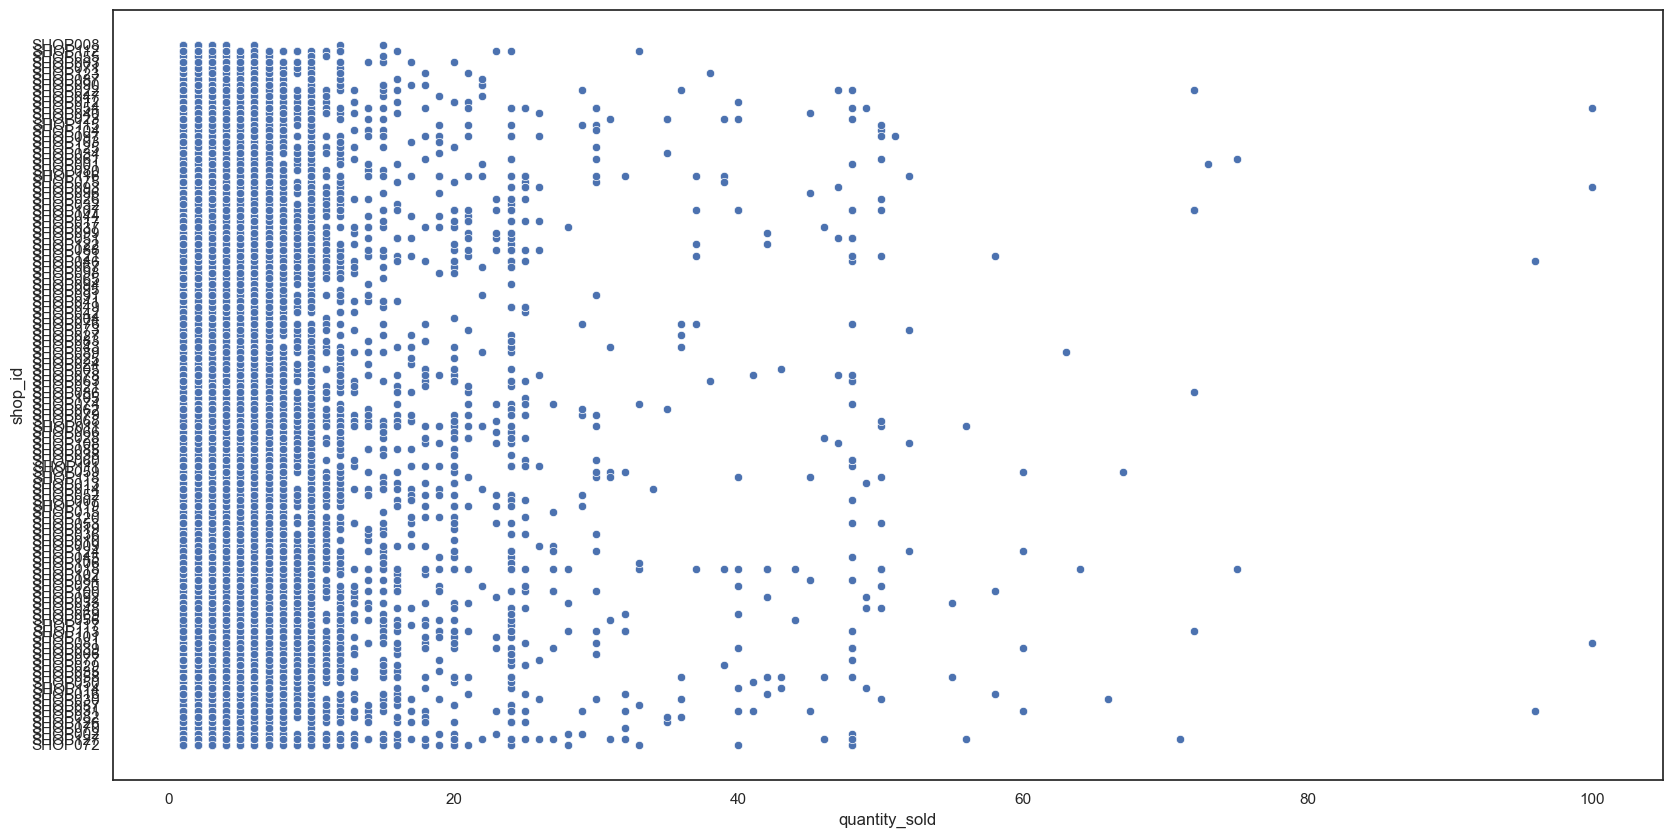

In [45]:
# plot the values of quantity_sold and shop_id
plt.figure(figsize=(20, 10))
sns.scatterplot(x="quantity_sold", y="shop_id", data=historical_transaction_df)

<Axes: xlabel='item_price', ylabel='shop_id'>

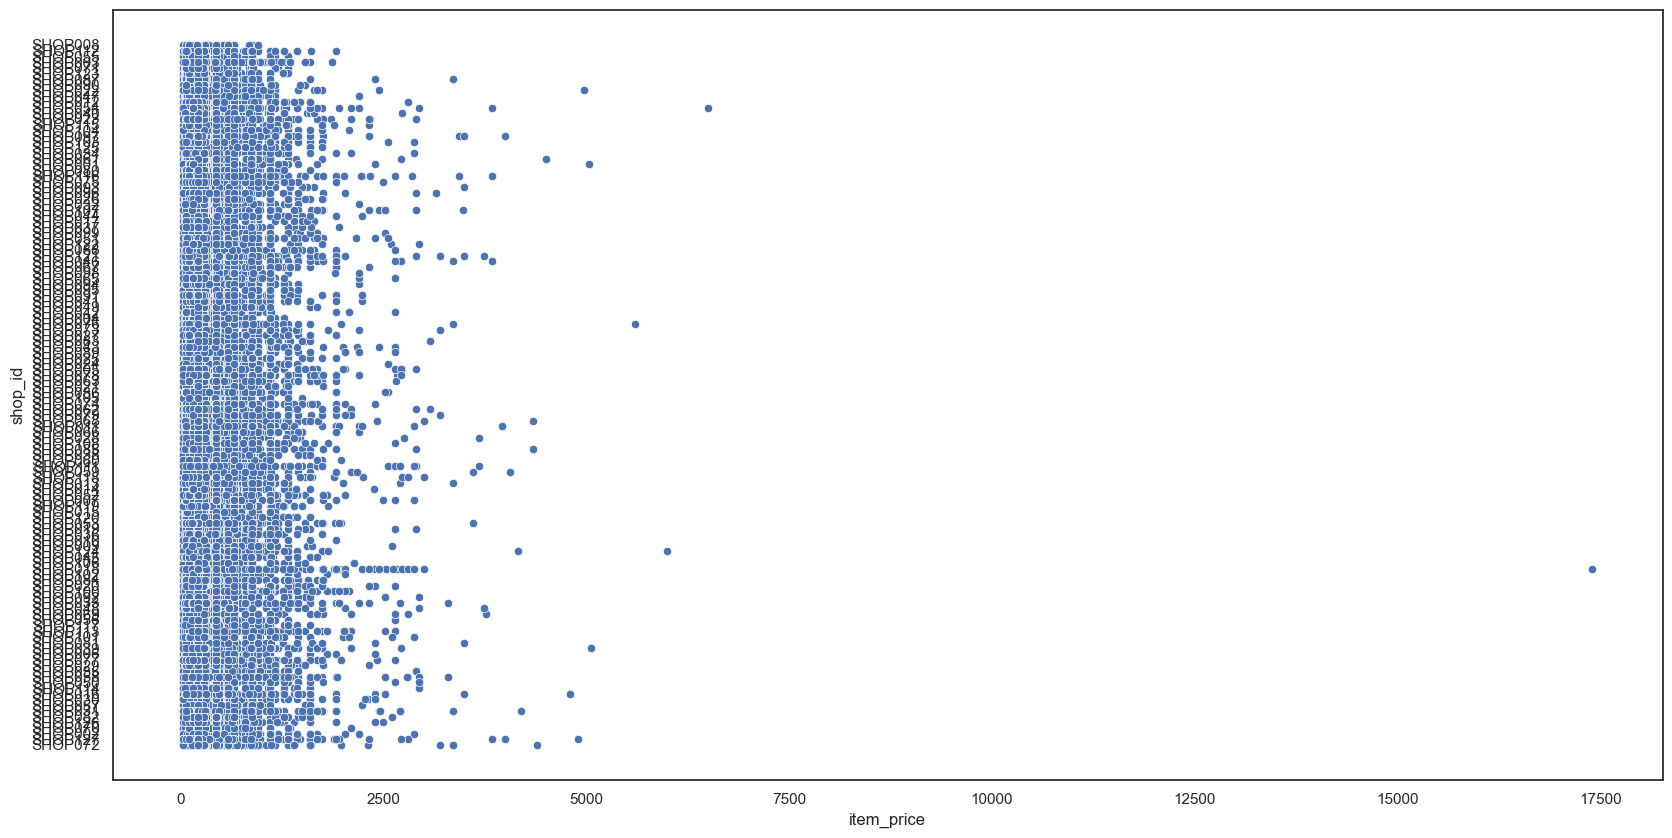

In [46]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="item_price", y="shop_id", data=historical_transaction_df)

In [47]:
historical_transaction_df["quantity_sold"].describe()

count    473974.000000
mean          1.464416
std           1.570627
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         100.000000
Name: quantity_sold, dtype: float64

Finding outliers using z-score


In [48]:
def find_outliers(df, column_name):
    mean = historical_transaction_df[column_name].mean()
    std = historical_transaction_df[column_name].std()
    outliers = []
    for value in df[column_name]:
        z_score = (value - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(value)
    return outliers

In [49]:
len(find_outliers(historical_transaction_df, "quantity_sold"))

3967

In [50]:
historical_transaction_df["item_price"].describe()

count    473974.000000
mean        206.689734
std         166.764732
min          35.000000
25%         100.000000
50%         200.000000
75%         220.000000
max       17400.000000
Name: item_price, dtype: float64

In [51]:
len(find_outliers(historical_transaction_df, "item_price"))

5566

In [52]:
def remove_outliers_using_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    df = df[abs(df[column] - mean) / std < 3]
    return df

In [53]:
# Remove the outliers from historical_transaction_df
# Have to decide whether to remove it from item_price or quantity_sold

## 5. Working with Invoice_id


In [54]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


In [55]:
historical_transaction_df.isna().sum()

item_description            0
transaction_date            0
invoice_id               6320
customer_id                 0
shop_id                     0
item_price                  0
quantity_sold               0
unit_price                  0
item_name                   0
item_volume_in_liters       0
dtype: int64

There are missing values in the invoice_id


In [56]:
invoice_df = (
    historical_transaction_df.groupby(["shop_id", "invoice_id"])["item_price"]
    .sum()
    .reset_index(name="price_per_invoice")
)
invoice_df = pd.DataFrame(invoice_df)
invoice_df.head()

,shop_id,invoice_id,price_per_invoice
0,SHOP001,71216.0,220
1,SHOP001,71241.0,220
2,SHOP001,71244.0,520
3,SHOP001,71249.0,220
4,SHOP001,71278.0,130


In [57]:
average_price_per_invoice = (
    invoice_df.groupby("shop_id")["price_per_invoice"]
    .mean()
    .reset_index(name="average_price_per_invoice")
)

In [58]:
average_price_per_invoice.head()

,shop_id,average_price_per_invoice
0,SHOP001,275.217957
1,SHOP002,286.891748
2,SHOP003,265.291245
3,SHOP004,265.566073
4,SHOP005,257.932768


In [59]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [60]:
store_info_df = pd.merge(store_info_df, average_price_per_invoice, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice
0,SHOP047,528,Moderate,258.963134
1,SHOP009,676,High,244.337246
2,SHOP083,676,Low,267.969095
3,SHOP117,676,Low,277.338505
4,SHOP042,676,Low,244.961924


In [61]:
store_info_df.shape

(124, 4)

## 6. Working with quantity sold feature


In [62]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


In [63]:
quantity_per_shop_df = (
    historical_transaction_df.groupby("shop_id")["quantity_sold"]
    .sum()
    .reset_index(name="quantity_per_shop")
)
quantity_per_shop_df.head()

,shop_id,quantity_per_shop
0,SHOP001,2995
1,SHOP002,7333
2,SHOP003,5216
3,SHOP004,4749
4,SHOP005,5923


In [64]:
store_info_df = pd.merge(store_info_df, quantity_per_shop_df, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop
0,SHOP047,528,Moderate,258.963134,2541
1,SHOP009,676,High,244.337246,6380
2,SHOP083,676,Low,267.969095,5011
3,SHOP117,676,Low,277.338505,6113
4,SHOP042,676,Low,244.961924,4398


In [65]:
store_info_df.shape

(124, 5)

## 7. Working with item_price feature


In [66]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


In [67]:
total_sales_per_shop_df = (
    historical_transaction_df.groupby("shop_id")["item_price"]
    .sum()
    .reset_index(name="total_sales")
)
total_sales_per_shop_df.head()

,shop_id,total_sales
0,SHOP001,433145
1,SHOP002,1090135
2,SHOP003,769685
3,SHOP004,711050
4,SHOP005,842995


In [68]:
store_info_df = pd.merge(store_info_df, total_sales_per_shop_df, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales
0,SHOP047,528,Moderate,258.963134,2541,338330
1,SHOP009,676,High,244.337246,6380,868070
2,SHOP083,676,Low,267.969095,5011,734380
3,SHOP117,676,Low,277.338505,6113,892340
4,SHOP042,676,Low,244.961924,4398,621510


In [69]:
store_info_df.shape

(124, 6)

## 8. Working with transaction date feature


In [70]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18


In [71]:
# Seperate date into day, month, year, time and day of week
historical_transaction_df["transaction_date"] = pd.to_datetime(
    historical_transaction_df["transaction_date"]
)
historical_transaction_df["transaction_day"] = historical_transaction_df[
    "transaction_date"
].dt.day
historical_transaction_df["transaction_month"] = historical_transaction_df[
    "transaction_date"
].dt.month
historical_transaction_df["transaction_year"] = historical_transaction_df[
    "transaction_date"
].dt.year
historical_transaction_df["transaction_time"] = historical_transaction_df[
    "transaction_date"
].dt.time
historical_transaction_df["transaction_day_of_week"] = historical_transaction_df[
    "transaction_date"
].dt.dayofweek

historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_year,transaction_time,transaction_day_of_week
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,2021,00:00:00,5
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,2021,00:00:00,6
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,2021,00:00:00,0
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,2021,00:00:00,0
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,2021,00:00:00,5


In [72]:
# Print the number of unique values in each column
for col in historical_transaction_df.columns:
    print(col, historical_transaction_df[col].nunique())

item_description 37
transaction_date 62
invoice_id 343342
customer_id 191636
shop_id 124
item_price 209
quantity_sold 66
unit_price 64
item_name 21
item_volume_in_liters 6
transaction_day 31
transaction_month 3
transaction_year 1
transaction_time 1
transaction_day_of_week 7


In [73]:
historical_transaction_df.drop(
    ["transaction_time", "transaction_year"], axis=1, inplace=True
)
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,5
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,6
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,0
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,0
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,5


### 8.1. Average Customers per month


In [74]:
avg_customers_per_month = (
    historical_transaction_df.groupby(["shop_id", "transaction_month"])["customer_id"]
    .nunique()
    .reset_index()
)
avg_customers_per_month = (
    avg_customers_per_month.groupby("shop_id")["customer_id"].mean().reset_index()
)
avg_customers_per_month = avg_customers_per_month.rename(
    columns={"customer_id": "avg_customers_per_month"}
)

avg_customers_per_month.head()

# Merge with store info
store_info_df = pd.merge(store_info_df, avg_customers_per_month, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000
1,SHOP009,676,High,244.337246,6380,868070,1013.000000
2,SHOP083,676,Low,267.969095,5011,734380,772.333333
3,SHOP117,676,Low,277.338505,6113,892340,858.333333
4,SHOP042,676,Low,244.961924,4398,621510,734.333333


### 8.2. Sales in each Month


In [75]:
historical_transaction_df["transaction_month"].unique()

array([12, 10, 11])

#### 8.2.1. Sales in October


In [76]:
october_shop_sales = historical_transaction_df[
    historical_transaction_df["transaction_month"] == 10
].reset_index()

october_shop_sales = october_shop_sales.groupby(["shop_id"])['item_price'].sum().reset_index(name='october_sales')
october_shop_sales = pd.DataFrame(october_shop_sales)
october_shop_sales.head()

,shop_id,october_sales
0,SHOP001,118800
1,SHOP002,281250
2,SHOP003,226950
3,SHOP004,197940
4,SHOP005,283045


In [77]:
october_shop_sales.shape

(123, 2)

In [78]:
store_info_df = pd.merge(store_info_df, october_shop_sales, on="shop_id", how="left")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0


In [79]:
# get the null value row in the dataset
store_info_df[store_info_df["october_sales"].isna()]

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales
51,SHOP008,678,Moderate,273.004926,377,55420,189.0,NaN


In [80]:
# fill the null value with 0
store_info_df["october_sales"].fillna(0, inplace=True)

#### 8.2.2. Sales in November

In [81]:
november_shop_sales = historical_transaction_df[
    historical_transaction_df["transaction_month"] == 11
].reset_index()

november_shop_sales = november_shop_sales.groupby(["shop_id"])['item_price'].sum().reset_index(name='november_sales')
november_shop_sales = pd.DataFrame(november_shop_sales)
november_shop_sales.head()

,shop_id,november_sales
0,SHOP001,159685
1,SHOP002,416220
2,SHOP003,290510
3,SHOP004,265260
4,SHOP005,314380


In [82]:
store_info_df = pd.merge(store_info_df, november_shop_sales, on="shop_id", how='left')
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0


In [83]:
store_info_df[store_info_df["november_sales"].isna()]

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales
51,SHOP008,678,Moderate,273.004926,377,55420,189.0,0.0,NaN


In [84]:
store_info_df["november_sales"].fillna(0, inplace=True)

#### 8.2.3. Sales in December

In [85]:
december_shop_sales = historical_transaction_df[
    historical_transaction_df["transaction_month"] == 12
].reset_index()

december_shop_sales = december_shop_sales.groupby(["shop_id"])['item_price'].sum().reset_index(name='december_sales')
december_shop_sales = pd.DataFrame(december_shop_sales)
december_shop_sales.head()

,shop_id,december_sales
0,SHOP001,154660
1,SHOP002,392665
2,SHOP003,252225
3,SHOP004,247850
4,SHOP005,245570


In [86]:
december_shop_sales.shape

(124, 2)

In [87]:
store_info_df = pd.merge(store_info_df, december_shop_sales, on="shop_id", how='left')

In [88]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870


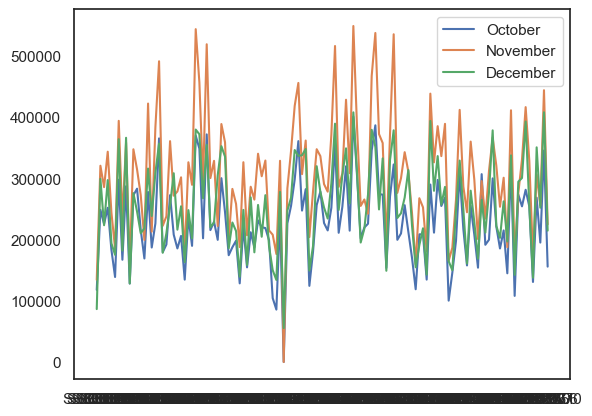

In [89]:
plt.plot(store_info_df["shop_id"], store_info_df["october_sales"])
plt.plot(store_info_df["shop_id"], store_info_df["november_sales"])
plt.plot(store_info_df["shop_id"], store_info_df["december_sales"])
plt.legend(["October", "November", "December"])
plt.show()

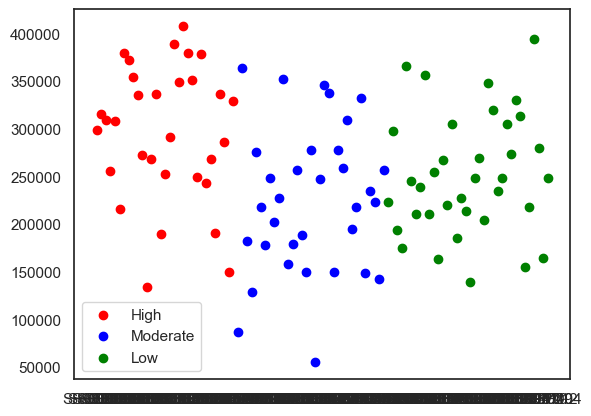

In [90]:
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "High"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "High"]["december_sales"],
    color="red",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["december_sales"],
    color="blue",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Low"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Low"]["december_sales"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

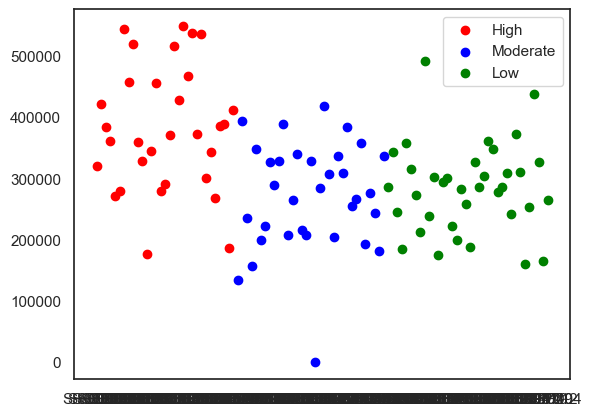

In [91]:
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "High"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "High"]["november_sales"],
    color="red",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["november_sales"],
    color="blue",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Low"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Low"]["november_sales"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

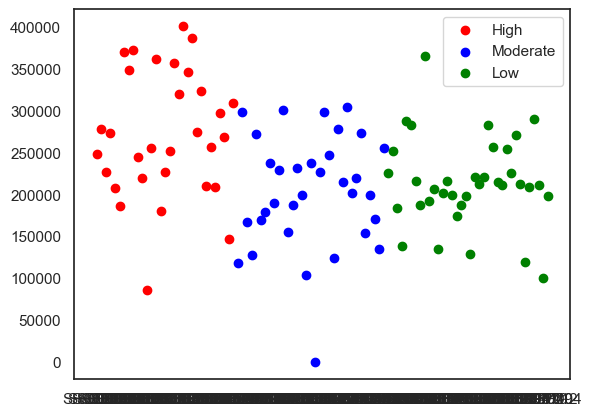

In [92]:
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "High"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "High"]["october_sales"],
    color="red",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Moderate"]["october_sales"],
    color="blue",
)
plt.scatter(
    store_info_df[store_info_df["shop_profile"] == "Low"]["shop_id"],
    store_info_df[store_info_df["shop_profile"] == "Low"]["october_sales"],
    color="green",
)
plt.legend(["High", "Moderate", "Low"])

# show the plot
plt.show()

### 8.3. Average time between transactions

In [93]:
train_df_ = historical_transaction_df.copy(deep=True)

train_df_.sort_values(["customer_id", "transaction_date"], inplace=True)

train_df_.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week
452281,ORANGE BARLEY 1.5L,2021-10-16 00:00:00+00:00,370560.0,0.00E+00,SHOP010,440,2,220,ORANGE BARLEY,1.5,16,10,5
308101,ORANGE BARLEY 1.5L,2021-10-26 00:00:00+00:00,61463.0,0.00E+00,SHOP034,880,4,220,ORANGE BARLEY,1.5,26,10,1
454752,FIT O ORANGE 1L,2021-10-27 00:00:00+00:00,1328902.0,0.00E+00,SHOP111,270,1,270,FIT O ORANGE,1.0,27,10,2
333814,SODA 1L,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,110,1,110,SODA,1.0,29,10,4
333815,GINGER BEER 1L,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,150,1,150,GINGER BEER,1.0,29,10,4


In [94]:
train_df_["time_since_last_purchase"] = (
    train_df_.groupby("customer_id")["transaction_date"].diff().dt.days
)
train_df_.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week,time_since_last_purchase
452281,ORANGE BARLEY 1.5L,2021-10-16 00:00:00+00:00,370560.0,0.00E+00,SHOP010,440,2,220,ORANGE BARLEY,1.5,16,10,5,NaN
308101,ORANGE BARLEY 1.5L,2021-10-26 00:00:00+00:00,61463.0,0.00E+00,SHOP034,880,4,220,ORANGE BARLEY,1.5,26,10,1,10.0
454752,FIT O ORANGE 1L,2021-10-27 00:00:00+00:00,1328902.0,0.00E+00,SHOP111,270,1,270,FIT O ORANGE,1.0,27,10,2,1.0
333814,SODA 1L,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,110,1,110,SODA,1.0,29,10,4,2.0
333815,GINGER BEER 1L,2021-10-29 00:00:00+00:00,668008.0,0.00E+00,SHOP081,150,1,150,GINGER BEER,1.0,29,10,4,0.0


In [95]:
avg_time_between_purchases = (
    train_df_.groupby("shop_id")["time_since_last_purchase"].mean().reset_index()
)
store_info_df = pd.merge(store_info_df, avg_time_between_purchases, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526


In [96]:
store_info_df.shape

(124, 11)

In [97]:
train_df_2 = historical_transaction_df.copy(deep=True)

# Weekend boolean column
train_df_2['weekend'] = train_df_2['transaction_day_of_week'].apply(lambda x: 1 if x >= 4 else 0)

weekend_sales = train_df_2[train_df_2['weekend'] == 1].groupby('shop_id')['item_price'].sum().reset_index()
weekend_sales = weekend_sales.rename(columns={'item_price': 'weekend_sales'})

weekday_sales = train_df_2[train_df_2['weekend'] == 0].groupby('shop_id')['item_price'].sum().reset_index()
weekday_sales = weekday_sales.rename(columns={'item_price': 'weekday_sales'})


store_info_df = pd.merge(store_info_df, weekend_sales, on="shop_id")
store_info_df = pd.merge(store_info_df, weekday_sales, on="shop_id")

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190


In [98]:
store_info_df.shape

(124, 13)

## 9. Working with Customer_id feature

In [99]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,5
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,6
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,0
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,0
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,5


In [100]:
store_info_df.shape

(124, 13)

### 9.1. Number of unique customers

In [101]:
unique_customers = (
    historical_transaction_df[["shop_id", "customer_id"]].groupby("shop_id")["customer_id"].nunique()
)
unique_customers_df = unique_customers.to_frame().reset_index()
unique_customers_df = unique_customers_df.rename(
    columns={"customer_id": "unique_customers"}
)

store_info_df = pd.merge(store_info_df, unique_customers_df, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841


In [102]:
store_info_df.shape

(124, 14)

### 9.2. Number of customers in each month

In [103]:
# have to find the number of customes for each month by shop_id

customers_by_month = (
    historical_transaction_df.groupby(["shop_id", "transaction_month"])["customer_id"]
    .count()
    .reset_index(name="customer_count")
)

customers_by_month.head()

,shop_id,transaction_month,customer_count
0,SHOP001,10,594
1,SHOP001,11,729
2,SHOP001,12,697
3,SHOP002,10,1300
4,SHOP002,11,1942


In [104]:
october_customers_df = customers_by_month[
    customers_by_month["transaction_month"] == 10
].reset_index(drop=True)
october_customers_df.rename(columns={"customer_count": "october_customers"}, inplace=True)
october_customers_df.drop(columns=["transaction_month"], inplace=True)
# october_customers_df.head()

store_info_df = pd.merge(store_info_df, october_customers_df, on="shop_id", how="left")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0


In [105]:
# fill na with 0
store_info_df["october_customers"].fillna(0, inplace=True)

In [106]:
store_info_df.shape

(124, 15)

In [107]:
november_customers_df = customers_by_month[
    customers_by_month["transaction_month"] == 11
].reset_index(drop=True)
november_customers_df.rename(columns={"customer_count": "november_customers"}, inplace=True)
november_customers_df.drop(columns=["transaction_month"], inplace=True)
# november_customers_df.head()

store_info_df = pd.merge(store_info_df, november_customers_df, on="shop_id", how="left")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0,700.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0,1795.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0,1488.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0,1674.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0,1321.0


In [108]:
store_info_df["november_customers"].fillna(0, inplace=True)

In [109]:
store_info_df.shape

(124, 16)

In [110]:
december_customers_df = customers_by_month[
    customers_by_month["transaction_month"] == 12
].reset_index(drop=True)
december_customers_df.rename(columns={"customer_count": "december_customers"}, inplace=True)
december_customers_df.drop(columns=["transaction_month"], inplace=True)
# december_customers_df.head()

store_info_df = pd.merge(store_info_df, december_customers_df, on="shop_id", how="left")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers,december_customers
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0,700.0,417
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0,1795.0,1448
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0,1488.0,1066
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0,1674.0,1264
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0,1321.0,996


In [111]:
store_info_df["december_customers"].fillna(0, inplace=True)

In [112]:
store_info_df.shape

(124, 17)

### 9.3. Number of customers came more than once

In [113]:
# Get the customers that came more than once to the corresponding shop
# number of customers that came more than once
customers_that_came_more_than_once = (
    historical_transaction_df.groupby("shop_id")["customer_id"]
    .apply(lambda x: x[x.duplicated()].nunique())
    .reset_index()
)

customers_that_came_more_than_once = customers_that_came_more_than_once.rename(
    columns={"customer_id": "came_more_than_once"}
)

store_info_df = pd.merge(store_info_df, customers_that_came_more_than_once, on="shop_id")
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers,december_customers,came_more_than_once
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0,700.0,417,319
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0,1795.0,1448,902
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0,1488.0,1066,700
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0,1674.0,1264,841
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0,1321.0,996,594


In [114]:
store_info_df.shape

(124, 18)

### 9.4. Number of customers came more than 5 times

In [115]:
# get number of customers that came more than 5 times
customer_df = historical_transaction_df.groupby(["shop_id", "customer_id"])["customer_id"].count().reset_index(name="frequency")

ncustomers_visited_morethan5 = customer_df[customer_df["frequency"] > 5].groupby("shop_id")["customer_id"].count().reset_index(name="ncustomers_visited_morethan5")

store_info_df = pd.merge(store_info_df, ncustomers_visited_morethan5, on="shop_id", how="left")

store_info_df["ncustomers_visited_morethan5"] = store_info_df["ncustomers_visited_morethan5"].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers,december_customers,came_more_than_once,ncustomers_visited_morethan5
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0,700.0,417,319,35.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0,1795.0,1448,902,83.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0,1488.0,1066,700,74.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0,1674.0,1264,841,93.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0,1321.0,996,594,60.0


In [116]:
store_info_df.shape

(124, 19)

### 9.5. Number of customers came more than 10 times

In [117]:
# get number of customers that came more than 5 times
customer_df = historical_transaction_df.groupby(["shop_id", "customer_id"])["customer_id"].count().reset_index(name="frequency")

ncustomers_visited_morethan10 = customer_df[customer_df["frequency"] > 10].groupby("shop_id")["customer_id"].count().reset_index(name="ncustomers_visited_morethan10")

store_info_df = pd.merge(store_info_df, ncustomers_visited_morethan10, on="shop_id", how="left")

store_info_df["ncustomers_visited_morethan10"] = store_info_df["ncustomers_visited_morethan10"].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers,december_customers,came_more_than_once,ncustomers_visited_morethan5,ncustomers_visited_morethan10
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,165200,928,575.0,700.0,417,319,35.0,7.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,439100,2498,1346.0,1795.0,1448,902,83.0,12.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,342515,1900,1060.0,1488.0,1066,700,74.0,13.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,419405,2037,1136.0,1674.0,1264,841,93.0,20.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,289190,1841,955.0,1321.0,996,594,60.0,11.0


In [118]:
store_info_df.shape

(124, 20)

### 9.6. Number of customers came more than 15 times

In [119]:
# get number of customers that came more than 5 times
customer_df = historical_transaction_df.groupby(["shop_id", "customer_id"])["customer_id"].count().reset_index(name="frequency")

ncustomers_visited_morethan15 = customer_df[customer_df["frequency"] > 15].groupby("shop_id")["customer_id"].count().reset_index(name="ncustomers_visited_morethan15")

store_info_df = pd.merge(store_info_df, ncustomers_visited_morethan15, on="shop_id", how="left")

store_info_df["ncustomers_visited_morethan15"] = store_info_df["ncustomers_visited_morethan15"].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,weekend_sales,weekday_sales,unique_customers,october_customers,november_customers,december_customers,came_more_than_once,ncustomers_visited_morethan5,ncustomers_visited_morethan10,ncustomers_visited_morethan15
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,173130,165200,928,575.0,700.0,417,319,35.0,7.0,3.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,428970,439100,2498,1346.0,1795.0,1448,902,83.0,12.0,2.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,391865,342515,1900,1060.0,1488.0,1066,700,74.0,13.0,2.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,472935,419405,2037,1136.0,1674.0,1264,841,93.0,20.0,4.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,332320,289190,1841,955.0,1321.0,996,594,60.0,11.0,1.0


In [120]:
store_info_df.shape

(124, 21)

## 10. Working with item_name feature

### 10.1. Beverage by name

In [121]:
# list unique item_name
unique_beverages = historical_transaction_df["item_name"].unique().tolist()

# store_info_df_ = store_info_df.copy(deep=True)

for bev in unique_beverages:
    nsold_perbev = historical_transaction_df[historical_transaction_df["item_name"] == bev].groupby("shop_id")["quantity_sold"].sum().reset_index(name=f"{bev}s_sold")
    store_info_df = pd.merge(store_info_df, nsold_perbev, on="shop_id", how="left")

bev_cols = [f"{x}s_sold" for x in unique_beverages]
store_info_df[bev_cols] = store_info_df[bev_cols].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,NECTOs_sold,FIT O MANGOs_sold,CREAM SODA APPLE POPs_sold,BOTTLED DRINKING WATERs_sold,SODAs_sold,ORANGE CRUSHs_sold,GINGER BEER SUGAR FREEs_sold,DRY GINGER ALE PETs_sold,CHOCOLATE MILKs_sold,LIME CRUSH JUICEs_sold
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,100,118,47,269,214,99,21,6.0,0.0,0.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,320,140,142,941,646,204,66,40.0,0.0,0.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,248,137,125,565,482,149,50,50.0,3.0,0.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,343,213,229,492,848,130,62,117.0,0.0,0.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,146,117,101,554,477,99,47,53.0,0.0,0.0


In [122]:
store_info_df.shape

(124, 42)

### 10.2. Beverage by item_description

In [123]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,5
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,6
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,0
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,0
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,5


In [124]:
# list unique item_name
unique_beverages_by_exact_name = historical_transaction_df["item_description"].unique().tolist()

# store_info_df_ = store_info_df.copy(deep=True)

for bev in unique_beverages_by_exact_name:
    nsold_perbev = historical_transaction_df[historical_transaction_df["item_description"] == bev].groupby("shop_id")["quantity_sold"].sum().reset_index(name=f"{bev}s_sold")
    store_info_df = pd.merge(store_info_df, nsold_perbev, on="shop_id", how="left")



In [125]:
bev_cols = [f"{x}s_sold" for x in unique_beverages_by_exact_name]
store_info_df[bev_cols] = store_info_df[bev_cols].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,BOTTLED DRINKING WATER 1.5Ls_sold,NECTO 1Ls_sold,GINGER BEER SUGAR FREE 500MLs_sold,ORANGE CRUSH 1.5Ls_sold,DRY GINGER ALE PET 500MLs_sold,LEMONADE 1Ls_sold,ORANGE CRUSH 1Ls_sold,GINGER BEER 400MLs_sold,CHOCOLATE MILK 180MLs_sold,LIME CRUSH JUICE 1Ls_sold
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,28,6.0,21,37,6.0,16.0,33.0,41.0,0.0,0.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,88,17.0,66,125,40.0,12.0,12.0,52.0,0.0,0.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,60,20.0,50,93,50.0,12.0,19.0,24.0,3.0,0.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,90,6.0,62,57,117.0,21.0,33.0,47.0,0.0,0.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,66,4.0,47,55,53.0,22.0,12.0,33.0,0.0,0.0


### 10.3. Get item by quantity

In [126]:
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,5
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,6
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,0
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,0
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,5


In [127]:
historical_transaction_df["volume_sold"] = (
    historical_transaction_df["quantity_sold"]
    * historical_transaction_df["item_volume_in_liters"]
)
historical_transaction_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,unit_price,item_name,item_volume_in_liters,transaction_day,transaction_month,transaction_day_of_week,volume_sold
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,1,220,ORANGE BARLEY,1.50,11,12,5,1.50
1,GINGER BEER 1.5L,2021-10-17 00:00:00+00:00,371.0,IA25,SHOP112,220,1,220,GINGER BEER,1.50,17,10,6,1.50
2,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,1,160,TONIC PET,0.50,13,12,0,0.50
3,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,1,150,CREAM SODA,1.00,13,12,0,1.00
4,STRAWBERRY MILK 180ML,2021-10-23 00:00:00+00:00,1310.0,7S00,SHOP112,210,3,70,STRAWBERRY MILK,0.18,23,10,5,0.54


In [128]:
# list unique item_name
unique_beverages_by_volume = historical_transaction_df["item_description"].unique().tolist()

# store_info_df_ = store_info_df.copy(deep=True)

for bev in unique_beverages_by_volume:
    nsold_perbev = historical_transaction_df[historical_transaction_df["item_description"] == bev].groupby("shop_id")["volume_sold"].sum().reset_index(name=f"{bev}_volume_sold")
    store_info_df = pd.merge(store_info_df, nsold_perbev, on="shop_id", how="left")



In [129]:
bev_cols = [f"{x}_volume_sold" for x in unique_beverages_by_volume]
store_info_df[bev_cols] = store_info_df[bev_cols].fillna(0)

store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,BOTTLED DRINKING WATER 1.5L_volume_sold,NECTO 1L_volume_sold,GINGER BEER SUGAR FREE 500ML_volume_sold,ORANGE CRUSH 1.5L_volume_sold,DRY GINGER ALE PET 500ML_volume_sold,LEMONADE 1L_volume_sold,ORANGE CRUSH 1L_volume_sold,GINGER BEER 400ML_volume_sold,CHOCOLATE MILK 180ML_volume_sold,LIME CRUSH JUICE 1L_volume_sold
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,42.0,6.0,10.5,55.5,3.0,16.0,33.0,16.4,0.00,0.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,132.0,17.0,33.0,187.5,20.0,12.0,12.0,20.8,0.00,0.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,90.0,20.0,25.0,139.5,25.0,12.0,19.0,9.6,0.54,0.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,135.0,6.0,31.0,85.5,58.5,21.0,33.0,18.8,0.00,0.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,99.0,4.0,23.5,82.5,26.5,22.0,12.0,13.2,0.00,0.0


In [130]:
store_info_df.dtypes

shop_id                              object
shop_area_sq_ft                       int64
shop_profile                         object
average_price_per_invoice           float64
quantity_per_shop                     int64
                                     ...   
LEMONADE 1L_volume_sold             float64
ORANGE CRUSH 1L_volume_sold         float64
GINGER BEER 400ML_volume_sold       float64
CHOCOLATE MILK 180ML_volume_sold    float64
LIME CRUSH JUICE 1L_volume_sold     float64
Length: 116, dtype: object

## 11. Average Earning per month

In [131]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,BOTTLED DRINKING WATER 1.5L_volume_sold,NECTO 1L_volume_sold,GINGER BEER SUGAR FREE 500ML_volume_sold,ORANGE CRUSH 1.5L_volume_sold,DRY GINGER ALE PET 500ML_volume_sold,LEMONADE 1L_volume_sold,ORANGE CRUSH 1L_volume_sold,GINGER BEER 400ML_volume_sold,CHOCOLATE MILK 180ML_volume_sold,LIME CRUSH JUICE 1L_volume_sold
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,42.0,6.0,10.5,55.5,3.0,16.0,33.0,16.4,0.00,0.0
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,132.0,17.0,33.0,187.5,20.0,12.0,12.0,20.8,0.00,0.0
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,90.0,20.0,25.0,139.5,25.0,12.0,19.0,9.6,0.54,0.0
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,135.0,6.0,31.0,85.5,58.5,21.0,33.0,18.8,0.00,0.0
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,99.0,4.0,23.5,82.5,26.5,22.0,12.0,13.2,0.00,0.0


In [132]:
store_info_df["average_month_sales"] = (
    store_info_df["october_sales"]
    + store_info_df["november_sales"]
    + store_info_df["december_sales"]
) / 3

store_info_df.head()

C:\Users\Joel\AppData\Local\Temp\ipykernel_7516\4169203022.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  store_info_df["average_month_sales"] = (


,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,NECTO 1L_volume_sold,GINGER BEER SUGAR FREE 500ML_volume_sold,ORANGE CRUSH 1.5L_volume_sold,DRY GINGER ALE PET 500ML_volume_sold,LEMONADE 1L_volume_sold,ORANGE CRUSH 1L_volume_sold,GINGER BEER 400ML_volume_sold,CHOCOLATE MILK 180ML_volume_sold,LIME CRUSH JUICE 1L_volume_sold,average_month_sales
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,6.0,10.5,55.5,3.0,16.0,33.0,16.4,0.00,0.0,112776.666667
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,17.0,33.0,187.5,20.0,12.0,12.0,20.8,0.00,0.0,289356.666667
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,20.0,25.0,139.5,25.0,12.0,19.0,9.6,0.54,0.0,244793.333333
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,6.0,31.0,85.5,58.5,21.0,33.0,18.8,0.00,0.0,297446.666667
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,4.0,23.5,82.5,26.5,22.0,12.0,13.2,0.00,0.0,207170.000000


In [133]:
store_info_df.shape

(124, 117)

## 12. Average customer per square feet

In [134]:
store_info_df["average_cust_per_sqft"] = (
    store_info_df["october_customers"]
    + store_info_df["november_customers"]
    + store_info_df["december_customers"]
) / store_info_df["shop_area_sq_ft"]

C:\Users\Joel\AppData\Local\Temp\ipykernel_7516\3228350932.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  store_info_df["average_cust_per_sqft"] = (


In [135]:
store_info_df.shape

(124, 118)

In [136]:
store_info_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,GINGER BEER SUGAR FREE 500ML_volume_sold,ORANGE CRUSH 1.5L_volume_sold,DRY GINGER ALE PET 500ML_volume_sold,LEMONADE 1L_volume_sold,ORANGE CRUSH 1L_volume_sold,GINGER BEER 400ML_volume_sold,CHOCOLATE MILK 180ML_volume_sold,LIME CRUSH JUICE 1L_volume_sold,average_month_sales,average_cust_per_sqft
0,SHOP047,528,Moderate,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,...,10.5,55.5,3.0,16.0,33.0,16.4,0.00,0.0,112776.666667,3.204545
1,SHOP009,676,High,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,...,33.0,187.5,20.0,12.0,12.0,20.8,0.00,0.0,289356.666667,6.788462
2,SHOP083,676,Low,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,...,25.0,139.5,25.0,12.0,19.0,9.6,0.54,0.0,244793.333333,5.346154
3,SHOP117,676,Low,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,...,31.0,85.5,58.5,21.0,33.0,18.8,0.00,0.0,297446.666667,6.026627
4,SHOP042,676,Low,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,...,23.5,82.5,26.5,22.0,12.0,13.2,0.00,0.0,207170.000000,4.840237


# Training the model

In [137]:
temp_df = store_info_df.copy(deep=True)

In [138]:
temp_df.shape

(124, 118)

In [139]:
test = temp_df[temp_df["shop_profile"].isnull()]
train = temp_df[temp_df["shop_profile"].notnull()]

In [140]:
test.shape

(24, 118)

In [141]:
train.shape

(100, 118)

In [142]:
train_x_df = train.drop(["shop_profile"], axis=1).reset_index(drop=True)
train_y_df = train["shop_profile"].reset_index(drop=True)

test_x_df = test.drop(["shop_profile"], axis=1).reset_index(drop=True)

In [143]:
train_x_df.shape, train_y_df.shape, test_x_df.shape

((100, 117), (100,), (24, 117))

In [144]:
mapping = {"Low": 0, "Moderate": 1, "High": 2}
train_y_df = train_y_df.replace(mapping)
train_y_df.head()

0    1
1    2
2    0
3    0
4    0
Name: shop_profile, dtype: int64

# MI Score

In [145]:
from sklearn.feature_selection import mutual_info_classif

mut_train_x_df = train_x_df.copy(deep=True)
mut_train_x_df.drop(["shop_id"], axis=1, inplace=True)

mi_scores = mutual_info_classif(mut_train_x_df, train_y_df)

scores = []
for feature, score in zip(mut_train_x_df.columns, mi_scores):
    scores.append((feature, score))
    # print(f"{feature}: {score:.2f}")

scores.sort(key=lambda x: x[1], reverse=True)
for feature, score in scores:
    print(f"{feature}: {score:.2f}")

FIT O ORANGE 200ML_volume_sold: 0.30
FIT O ORANGE 200MLs_sold: 0.27
BOTTLED DRINKING WATER 500MLs_sold: 0.25
BOTTLED DRINKING WATER 500ML_volume_sold: 0.25
november_customers: 0.21
NECTO 500MLs_sold: 0.21
FIT O ORANGEs_sold: 0.20
GINGER BEER SUGAR FREE 500ML_volume_sold: 0.20
FIT O ORANGE 1L_volume_sold: 0.20
NECTO 500ML_volume_sold: 0.19
FIT O ORANGE 1Ls_sold: 0.18
SODA PETs_sold: 0.18
SODA PET 1.5L_volume_sold: 0.17
SODA PET 1.5Ls_sold: 0.17
unique_customers: 0.17
GINGER BEER SUGAR FREEs_sold: 0.16
GINGER BEER 500ML_volume_sold: 0.16
GINGER BEER SUGAR FREE 500MLs_sold: 0.16
december_customers: 0.15
quantity_per_shop: 0.15
LEMONADEs_sold: 0.15
LEMONADE 500MLs_sold: 0.15
october_sales: 0.14
BOTTLED DRINKING WATER 1.5Ls_sold: 0.14
LEMONADE 500ML_volume_sold: 0.14
GINGER BEER 500MLs_sold: 0.13
BOTTLED DRINKING WATER 1.5L_volume_sold: 0.13
CHOCOLATE MILK 180ML_volume_sold: 0.13
DRY GINGER ALE PET 500ML_volume_sold: 0.13
october_customers: 0.13
BOTTLED DRINKING WATERs_sold: 0.12
GINGER BEE

# Data Visualization

In [957]:
store_info_df.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile',
       'average_price_per_invoice', 'quantity_per_shop', 'total_sales',
       'avg_customers_per_month', 'october_sales', 'november_sales',
       'december_sales',
       ...
       'GINGER BEER SUGAR FREE 500ML_volume_sold',
       'ORANGE CRUSH 1.5L_volume_sold', 'DRY GINGER ALE PET 500ML_volume_sold',
       'LEMONADE 1L_volume_sold', 'ORANGE CRUSH 1L_volume_sold',
       'GINGER BEER 400ML_volume_sold', 'CHOCOLATE MILK 180ML_volume_sold',
       'LIME CRUSH JUICE 1L_volume_sold', 'average_month_sales',
       'average_cust_per_sqft'],
      dtype='object', length=118)

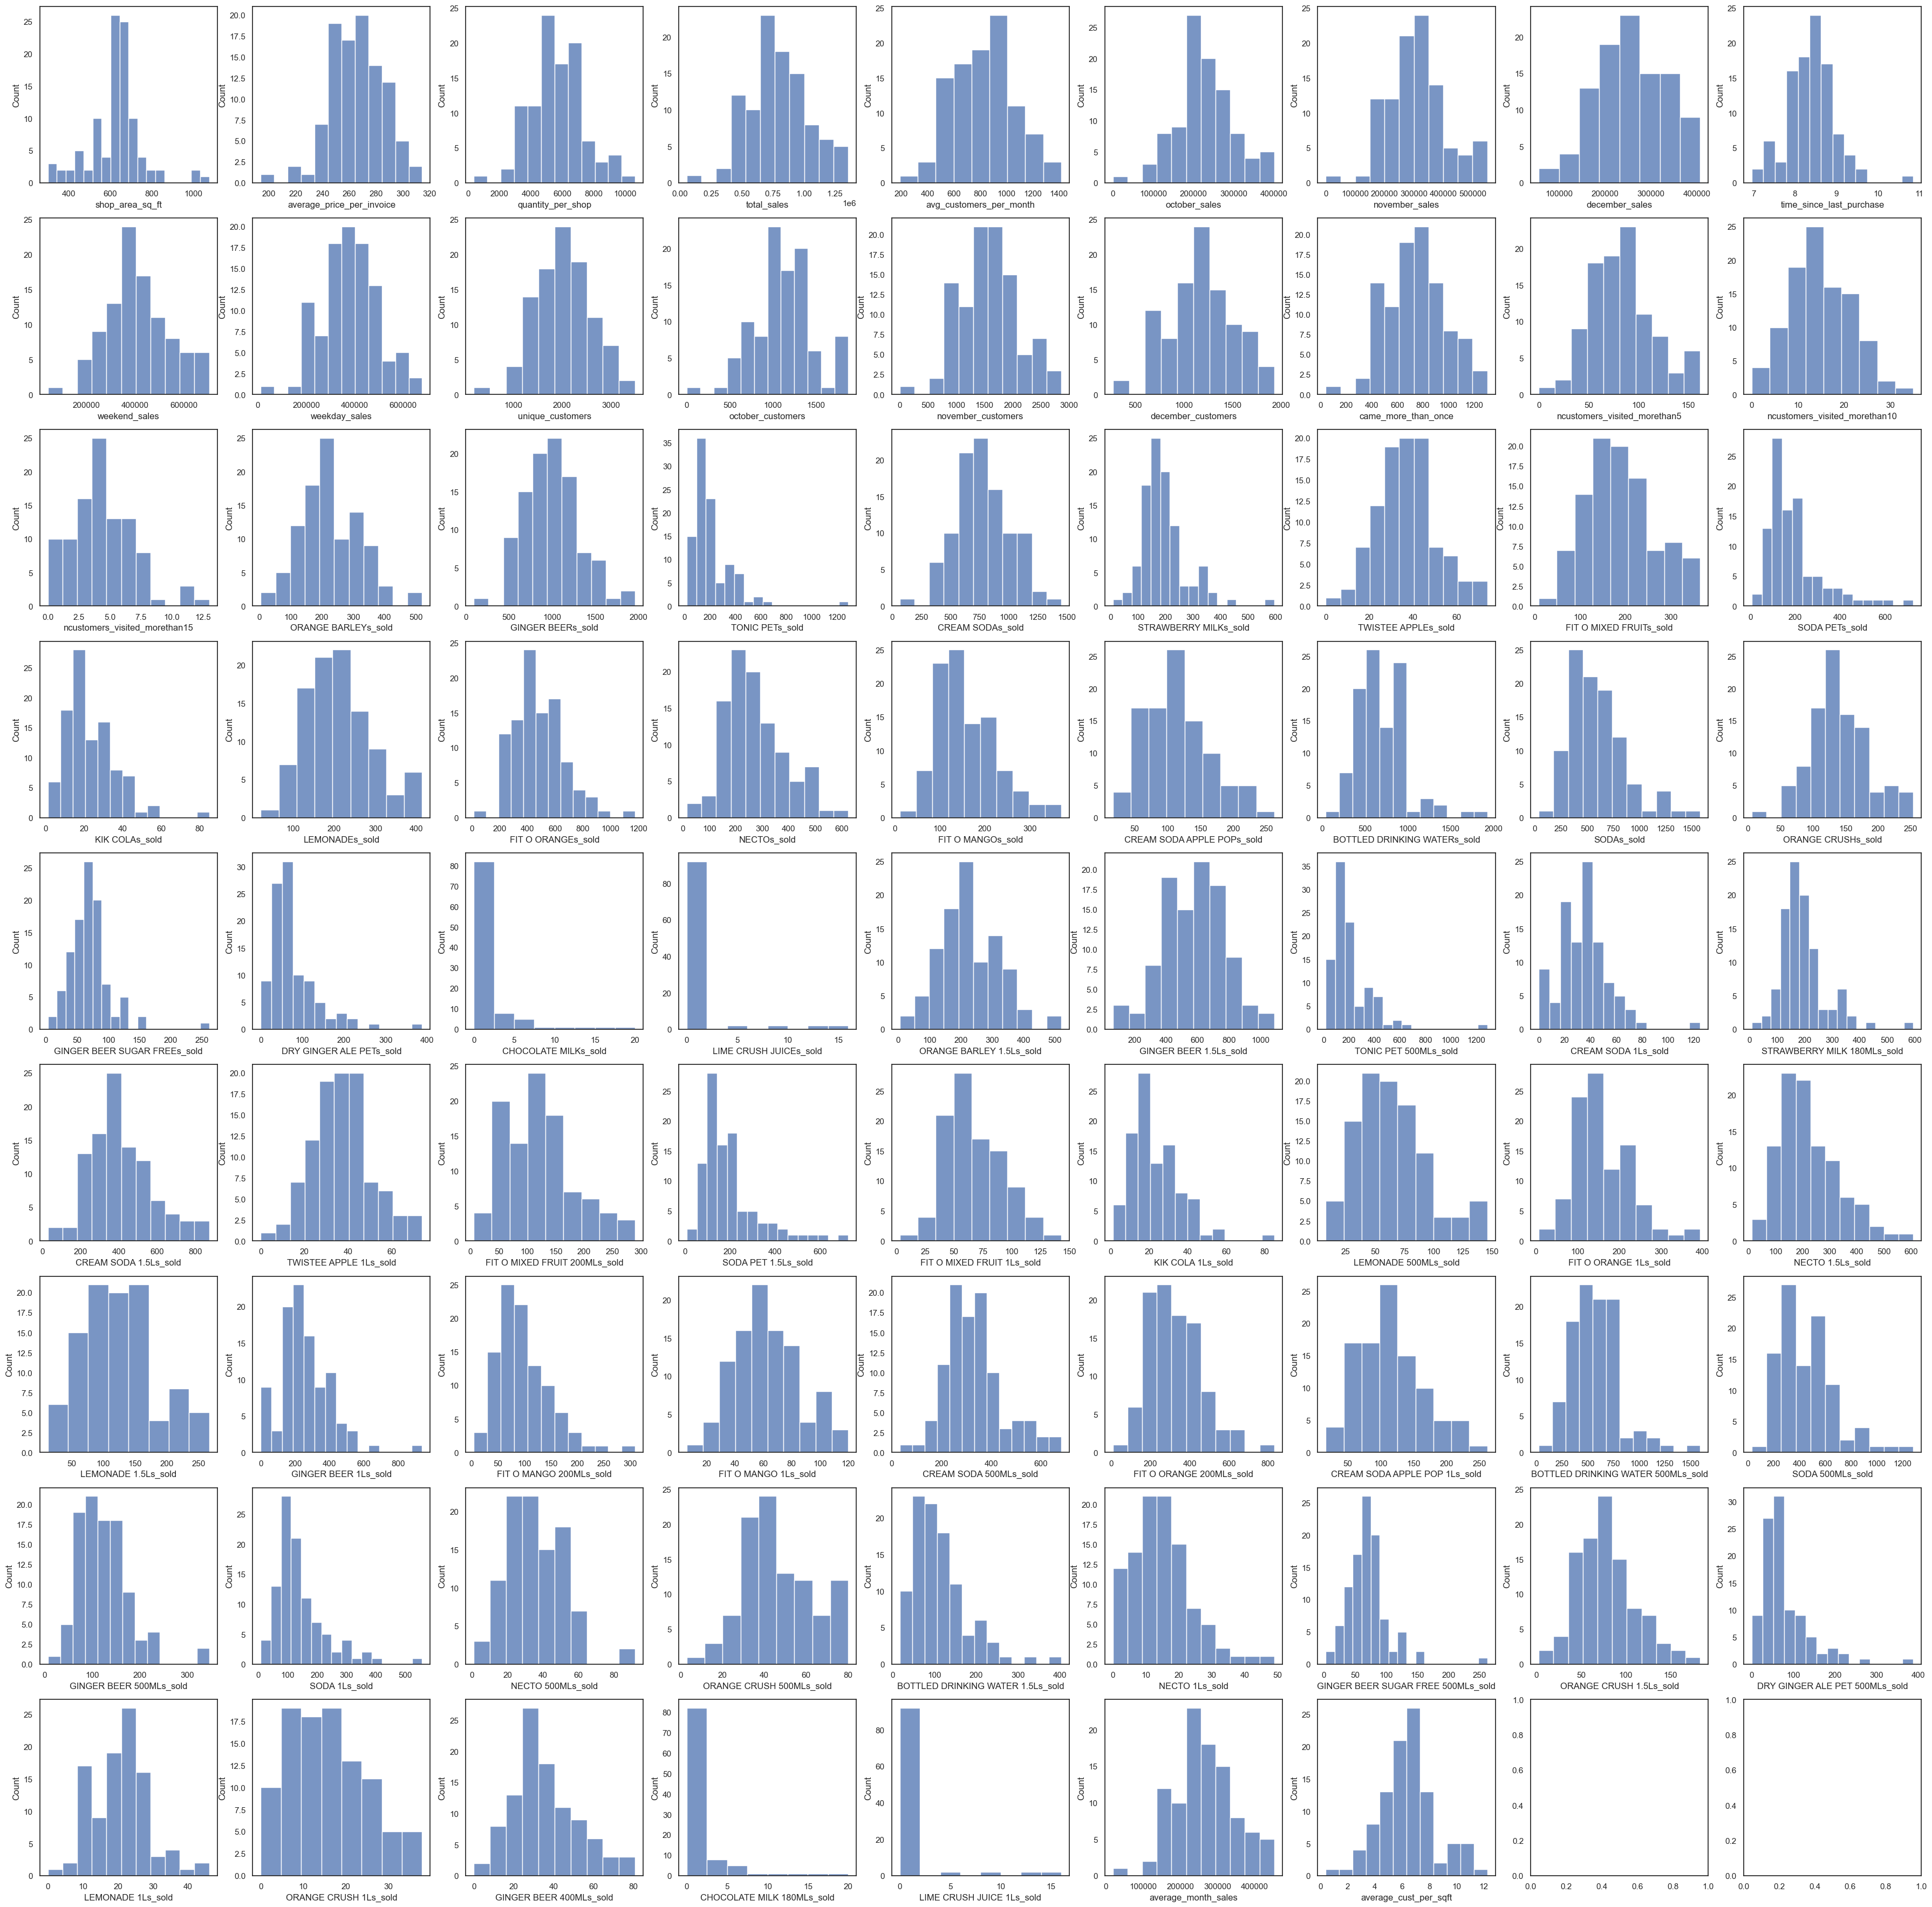

In [807]:
n_rows=9
n_cols=9

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(45, 45))

for i, column in enumerate(mut_train_x_df):
    sns.histplot(mut_train_x_df[column], ax=axes[i // n_cols, i % n_cols])

In [804]:
def ScatterPlot(column):
    plt.scatter(
        store_info_df[store_info_df["shop_profile"] == "High"]["shop_id"],
        store_info_df[store_info_df["shop_profile"] == "High"][column],
        color="red",
    )
    plt.scatter(
        store_info_df[store_info_df["shop_profile"] == "Moderate"]["shop_id"],
        store_info_df[store_info_df["shop_profile"] == "Moderate"][column],
        color="blue",
    )
    plt.scatter(
        store_info_df[store_info_df["shop_profile"] == "Low"]["shop_id"],
        store_info_df[store_info_df["shop_profile"] == "Low"][column],
        color="green",
    )
    plt.legend(["High", "Moderate", "Low"])

    # show the plot
    plt.show()

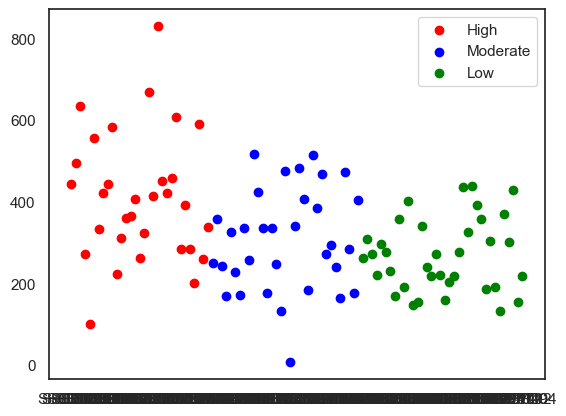

In [805]:
ScatterPlot("FIT O ORANGE 200MLs_sold")

# Scale the Data

In [441]:
train_x_df.columns

Index(['shop_id', 'shop_area_sq_ft', 'average_price_per_invoice',
       'quantity_per_shop', 'total_sales', 'avg_customers_per_month',
       'october_sales', 'november_sales', 'december_sales',
       'time_since_last_purchase', 'weekend_sales', 'weekday_sales',
       'unique_customers', 'october_customers', 'november_customers',
       'december_customers', 'came_more_than_once',
       'ncustomers_visited_morethan5', 'ncustomers_visited_morethan10',
       'ncustomers_visited_morethan15', 'ORANGE BARLEYs_sold',
       'GINGER BEERs_sold', 'TONIC PETs_sold', 'CREAM SODAs_sold',
       'STRAWBERRY MILKs_sold', 'TWISTEE APPLEs_sold',
       'FIT O MIXED FRUITs_sold', 'SODA PETs_sold', 'KIK COLAs_sold',
       'LEMONADEs_sold', 'FIT O ORANGEs_sold', 'NECTOs_sold',
       'FIT O MANGOs_sold', 'CREAM SODA APPLE POPs_sold',
       'BOTTLED DRINKING WATERs_sold', 'SODAs_sold', 'ORANGE CRUSHs_sold',
       'GINGER BEER SUGAR FREEs_sold', 'DRY GINGER ALE PETs_sold',
       'CHOCOLATE MILKs_

In [467]:
scaling_columns = list(train_x_df.columns)
scaling_columns.remove("shop_id")

In [473]:
temp_df.shape

(124, 44)

In [474]:
scaled_df = temp_df.copy(deep=True)

In [475]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df[scaling_columns] = scaler.fit_transform(scaled_df[scaling_columns])
scaled_df.head()

,shop_id,shop_area_sq_ft,shop_profile,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,...,CREAM SODA APPLE POPs_sold,BOTTLED DRINKING WATERs_sold,SODAs_sold,ORANGE CRUSHs_sold,GINGER BEER SUGAR FREEs_sold,DRY GINGER ALE PETs_sold,CHOCOLATE MILKs_sold,LIME CRUSH JUICEs_sold,average_month_sales,average_cust_per_sqft
0,SHOP047,-0.728603,Moderate,-0.407496,-1.842573,-1.942416,-1.977150,-1.574340,-1.809145,-2.273287,...,-1.400737,-1.417999,-1.391100,-0.866932,-1.450381,-1.234164,-0.376062,-0.238366,-1.942416,-1.530166
1,SHOP009,0.443600,High,-1.153332,0.471690,0.335515,0.838398,0.308663,0.150716,0.563887,...,0.501578,0.927031,0.252520,1.478270,-0.079362,-0.618615,-0.376062,-0.238366,0.335515,0.193698
2,SHOP083,0.443600,Low,0.051756,-0.353584,-0.239364,-0.212158,-0.023983,-0.216350,-0.446092,...,0.161164,-0.385069,-0.371447,0.249831,-0.566835,-0.437571,0.520701,-0.238366,-0.239364,-0.500052
3,SHOP117,0.443600,Low,0.529542,0.310734,0.439879,0.163249,0.356246,0.391571,0.538065,...,2.243699,-0.639812,1.021065,-0.174539,-0.201230,0.775423,-0.376062,-0.238366,0.439879,-0.172744
4,SHOP042,0.443600,Low,-1.121477,-0.723118,-0.724715,-0.378035,-0.630103,-0.650729,-0.839354,...,-0.319421,-0.423455,-0.390470,-0.866932,-0.658237,-0.383258,-0.376062,-0.238366,-0.724715,-0.743398


In [476]:
scaled_df.shape

(124, 44)

In [477]:
test_scaled = scaled_df[scaled_df["shop_profile"].isnull()]
train_scaled = scaled_df[scaled_df["shop_profile"].notnull()]

train_x_scaled_df = train_scaled.drop(["shop_profile"], axis=1).reset_index(drop=True)
train_y_scaled_df = train_scaled["shop_profile"].reset_index(drop=True)

test_x_scaled_df = test_scaled.drop(["shop_profile"], axis=1).reset_index(drop=True)


mapping = {"Low": 0, "Moderate": 1, "High": 2}
train_y_scaled_df = train_y_scaled_df.replace(mapping)
train_y_scaled_df.head()

0    1
1    2
2    0
3    0
4    0
Name: shop_profile, dtype: int64

In [501]:
shop_ids = test_x_scaled_df["shop_id"].reset_index(drop=True)

In [504]:
train_x_scaled_df.drop(["shop_id"], axis=1, inplace=True)
test_x_scaled_df.drop(["shop_id"], axis=1, inplace=True)

Scale the data using MinMaxScaler

# Split the train data into train and validation data

In [443]:
train_dataframe_to_split = pd.concat([train_x_df, train_y_df], axis=1)
train_dataframe_to_split.head()

,shop_id,shop_area_sq_ft,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,...,BOTTLED DRINKING WATERs_sold,SODAs_sold,ORANGE CRUSHs_sold,GINGER BEER SUGAR FREEs_sold,DRY GINGER ALE PETs_sold,CHOCOLATE MILKs_sold,LIME CRUSH JUICEs_sold,average_month_sales,average_cust_per_sqft,shop_profile
0,SHOP047,528,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,...,269,214,99,21,6.0,0.0,0.0,112776.666667,3.204545,1
1,SHOP009,676,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,...,941,646,204,66,40.0,0.0,0.0,289356.666667,6.788462,2
2,SHOP083,676,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,...,565,482,149,50,50.0,3.0,0.0,244793.333333,5.346154,0
3,SHOP117,676,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,...,492,848,130,62,117.0,0.0,0.0,297446.666667,6.026627,0
4,SHOP042,676,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,...,554,477,99,47,53.0,0.0,0.0,207170.000000,4.840237,0


In [444]:
train_dataframe_to_split.drop(["shop_id"], axis=1, inplace=True)

In [445]:
train_dataframe_to_split.head()

,shop_area_sq_ft,average_price_per_invoice,quantity_per_shop,total_sales,avg_customers_per_month,october_sales,november_sales,december_sales,time_since_last_purchase,weekend_sales,...,BOTTLED DRINKING WATERs_sold,SODAs_sold,ORANGE CRUSHs_sold,GINGER BEER SUGAR FREEs_sold,DRY GINGER ALE PETs_sold,CHOCOLATE MILKs_sold,LIME CRUSH JUICEs_sold,average_month_sales,average_cust_per_sqft,shop_profile
0,528,258.963134,2541,338330,368.000000,117745.0,134170.0,86415,7.454348,173130,...,269,214,99,21,6.0,0.0,0.0,112776.666667,3.204545,1
1,676,244.337246,6380,868070,1013.000000,248535.0,320510.0,299025,8.796630,428970,...,941,646,204,66,40.0,0.0,0.0,289356.666667,6.788462,2
2,676,267.969095,5011,734380,772.333333,225430.0,285610.0,223340,8.603279,391865,...,565,482,149,50,50.0,3.0,0.0,244793.333333,5.346154,0
3,676,277.338505,6113,892340,858.333333,251840.0,343410.0,297090,8.601393,472935,...,492,848,130,62,117.0,0.0,0.0,297446.666667,6.026627,0
4,676,244.961924,4398,621510,734.333333,183330.0,244310.0,193870,8.930526,332320,...,554,477,99,47,53.0,0.0,0.0,207170.000000,4.840237,0


In [478]:
train_dataframe_to_split_scaled = pd.concat([train_x_scaled_df, train_y_scaled_df], axis=1)
train_dataframe_to_split_scaled.drop(["shop_id"], axis=1, inplace=True)

In [448]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_dataframe_to_split.drop("shop_profile", axis=1),
    train_dataframe_to_split["shop_profile"],
    test_size=0.2,
    random_state=0,
)

In [479]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    train_dataframe_to_split_scaled.drop("shop_profile", axis=1),
    train_dataframe_to_split_scaled["shop_profile"],
    test_size=0.2,
    random_state=0,
)

# Using Logistic Regression

In [480]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

LR_model = LogisticRegression(random_state=0, max_iter=1000000)
LR_model.fit(X_train_scaled, y_train_scaled)
y_pred = LR_model.predict(X_test_scaled)

f1 = f1_score(y_test_scaled, y_pred, average='macro')
accuracy = accuracy_score(y_test_scaled, y_pred)

print('F1 score:', f1)
print('Accuracy:', accuracy)

F1 score: 0.6524886877828054
Accuracy: 0.65


In [510]:
from sklearn.model_selection import RandomizedSearchCV
LR_model = LogisticRegression()

model_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 100000],
    'class_weight': [None, 'balanced']
}
# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (300 models total)
clf = RandomizedSearchCV(LR_model, model_params, n_iter=1000, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(train_x_scaled_df, train_y_scaled_df)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())
print("Best Accuracy: {:.2f}%".format(model.best_score_ * 100))

d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 640 is smaller than n_iter=1000. Running 640 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\linear_model\_sag

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
Best Accuracy: 71.00%


d:\University\Academics_2020_4th_Sem\data-storm-4\.venv\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [ nan  nan 0.52  nan 0.45 0.6  0.6  0.6  0.6  0.6   nan  nan  nan  nan
  nan 0.61 0.61  nan 0.63 0.63  nan  nan 0.52  nan 0.46 0.6  0.6  0.6
 0.6  0.6   nan  nan  nan  nan  nan 0.61 0.61  nan 0.62 0.63  nan  nan
 0.52  nan 0.46 0.6  0.6  0.6  0.6  0.6   nan  nan  nan  nan  nan 0.61
 0.61  nan 0.61 0.62  nan  nan 0.52  nan 0.46 0.6  0.6  0.6  0.6  0.6
  nan  nan  nan  nan  nan 0.61 0.61  nan 0.61 0.6   nan  nan 0.54  nan
 0.49 0.59 0.59 0.61 0.59 0.59  nan  nan  nan  nan  nan 0.61 0.61  nan
 0.64 0.62  nan  nan 0.54  nan 0.5  0.59 0.59 0.61 0.59 0.59  nan  nan
  nan  nan  nan 0.61 0.61  nan 0.62 0.64  nan  nan 0.54  nan 0.5  0.59
 0.59 0.61 0.59 0.59  nan  nan  nan  nan  nan 0.61 0.61  nan 0.61 0.62
  nan  nan 0.54  nan 0.5  0.59 0.59 0.61 0.59 0.59  nan  nan  nan  nan
  nan 0.61 0.61  nan 0.61 0.61  nan  nan 0.6   

penaly : l1
C : 1
class_weight : balanced
solver : saga
max_iter : 1000

In [511]:

LR_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=1000, class_weight="balanced")
LR_model.fit(train_x_scaled_df, train_y_scaled_df)
y_pred = LR_model.predict(test_x_scaled_df)

y_pred = pd.DataFrame(y_pred, columns=["shop_profile"])
y_pred["shop_profile"] = y_pred["shop_profile"].map({0: "Low", 1: "Moderate", 2: "High"})
y_pred.head()

,shop_profile
0,High
1,Low
2,Moderate
3,Moderate
4,Moderate


In [512]:
sample_try_ = pd.concat([shop_ids, y_pred], axis=1)
sample_try_.head(24)

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Moderate
3,SHOP097,Moderate
4,SHOP044,Moderate
5,SHOP030,Moderate
6,SHOP038,Low
7,SHOP029,Moderate
8,SHOP096,Low
9,SHOP092,High


# Using Random Forest Classifier

In [459]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print('F1 score:', f1)
print('Accuracy:', accuracy)

F1 score: 0.6222222222222222
Accuracy: 0.65


In [514]:
shop_ids = test_x_df["shop_id"].reset_index(drop=True)

train_x_df.drop(["shop_id"], axis=1, inplace=True)
test_x_df.drop(["shop_id"], axis=1, inplace=True)

In [516]:
train_y_df.shape

(100,)

In [517]:
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestClassifier(random_state=42)

model_params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth':[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 50, 100, None],
}
# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(train_x_df, train_y_df)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())
print("Best Accuracy: {:.2f}%".format(model.best_score_ * 100))

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
Best Accuracy: 66.00%


In [518]:
model = RandomForestClassifier(random_state=42, criterion='gini', max_features='log2', n_estimators=50, max_depth=16)
model.fit(train_x_df, train_y_df)
y_pred = model.predict(test_x_df)

y_pred = pd.DataFrame(y_pred, columns=["shop_profile"])
y_pred["shop_profile"] = y_pred["shop_profile"].map({0: "Low", 1: "Moderate", 2: "High"})
y_pred.head()

,shop_profile
0,Low
1,Low
2,Low
3,Moderate
4,Moderate


In [519]:
sample_try__ = pd.concat([shop_ids, y_pred], axis=1)
sample_try__.head(24)

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate
5,SHOP030,Low
6,SHOP038,Low
7,SHOP029,Low
8,SHOP096,High
9,SHOP092,Low


# Using SVM

In [500]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=10, random_state=0, degree=10)

#Train the model using the training sets
clf.fit(X_train_scaled, y_train_scaled)

#Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

f1 = f1_score(y_test_scaled, y_pred, average='macro')

print('F1 score:', f1)

accuracy = accuracy_score(y_test_scaled, y_pred)*100
print("Accuracy: {:.2f}%".format(accuracy))

F1 score: 0.7384615384615385
Accuracy: 75.00%


In [505]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=10, random_state=0, degree=10)

#Train the model using the training sets
clf.fit(train_x_scaled_df, train_y_scaled_df)

#Predict the response for test dataset
y_pred = clf.predict(test_x_scaled_df)
y_pred = pd.DataFrame(y_pred, columns=["shop_profile"])
y_pred["shop_profile"] = y_pred["shop_profile"].map({0: "Low", 1: "Moderate", 2: "High"})
y_pred.head()

,shop_profile
0,Low
1,Low
2,Low
3,Moderate
4,Low


In [506]:
sample_try = pd.concat([shop_ids, y_pred], axis=1)
sample_try.head(24)

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Low
5,SHOP030,Moderate
6,SHOP038,Low
7,SHOP029,Low
8,SHOP096,Low
9,SHOP092,High
